# hpg_store_info の概要把握

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [10]:
!cd

C:\Users\hiroshi_kuriyama\Desktop\新人研修\kaggle_Recruit\recruit_exercise\notebook


In [11]:
# データの読み込み
# 文字コードはUTF-8(BOMなし)
raw_hpg_store_info = pd.read_csv('../data/hpg_store_info.csv', engine='python', encoding='UTF-8')

## テーブルのサイズ、要素の確認

データセットの概要

- 4690行、5列

| column | hpg_store_id | hpg_genre_name | hpg_area_name | latitude | longitude |
| :----- | ------------ | -------------- | ------------- | -------- | --------- |
| 意味   | hpgの店ID    | ジャンル       | 地名          | 緯度     | 経度      |
| 型     | object       | object         | object        | float    | float     |
| 欠損   | なし         | なし           | なし          | なし     | なし      |

In [12]:
# 列と行
raw_hpg_store_info.shape

(4690, 5)

In [13]:
# 型を確認
raw_hpg_store_info.dtypes

hpg_store_id       object
hpg_genre_name     object
hpg_area_name      object
latitude          float64
longitude         float64
dtype: object

In [47]:
# 欠損の確認
raw_hpg_store_info.isnull().any(axis=0)

hpg_store_id      False
hpg_genre_name    False
hpg_area_name     False
latitude          False
longitude         False
dtype: bool

In [14]:
raw_hpg_store_info.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [28]:
# ランダムに行を表示
raw_hpg_store_info.sample(n=10, random_state=0)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
291,hpg_41eb89ace6d5273f,Japanese style,Shizuoka-ken Shizuoka-shi Hinodechō,34.976196,138.395167
2112,hpg_4e19eb463f5e5c8f,International cuisine,Tōkyō-to Shibuya-ku None,35.659214,139.699736
3938,hpg_7757bca6eeaa9e7c,Seafood,Tōkyō-to Fussa-shi Musashinodai,35.748761,139.333801
3212,hpg_923981676bbf3cbc,Creation,Tōkyō-to Toshima-ku None,35.730068,139.711742
898,hpg_bb23953129d0d43b,Japanese style,Hiroshima-ken Fukuyama-shi Sannomaruchō,34.489677,133.362130
4176,hpg_0fb269423e6a4c07,Spain Bar/Italian Bar,Ōsaka-fu Ōsaka-shi Shinsaibashisuji,34.669514,135.501425
487,hpg_5276c62fa1593aab,Japanese style,Tōkyō-to Shinjuku-ku None,35.691384,139.701256
1473,hpg_3a3289a9c062f404,Japanese style,Fukuoka-ken Fukuoka-shi Ōmiya,33.579734,130.401762
3605,hpg_d3a6919845d25460,Japanese cuisine/Kaiseki,Osaka Prefecture Osaka None,34.701519,135.498859
1280,hpg_5b25b871b61346ad,Japanese style,Fukuoka-ken Kurume-shi Higashimachi,33.311645,130.518556


In [32]:
# object型の概要
raw_hpg_store_info.describe(include='O')

,hpg_store_id,hpg_genre_name,hpg_area_name
count,4690,4690,4690
unique,4690,34,119
top,hpg_9ad6c4b575e68b0b,Japanese style,Tōkyō-to Shinjuku-ku None
freq,1,1750,257


In [33]:
# 数値型の概要
raw_hpg_store_info.describe()

,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


## hpg_store_id (hpgの店ID)


### 特徴
  - 重複IDなし


In [49]:
raw_hpg_store_info['hpg_store_id'].duplicated().any(axis=0)

False

## hpg_genre_name (hpgでの店のジャンル)

### 特徴

- ジャンルは３４種類
- Japanese Style が最も多く、全体の37%。ほとんど出現しないジャンルも複数ある。
- 分類の粒度が不明（日本料理にもいくつかジャンルがある）

In [58]:
# ジャンル数を確認
raw_hpg_store_info['hpg_genre_name'].unique().size

34

In [71]:
hpg_genre_name_dist = raw_hpg_store_info['hpg_genre_name'].value_counts()

In [82]:
# 出現回数を表示
print('head_5')
print(hpg_genre_name_dist.head())
print()
print('tail_5')
print(hpg_genre_name_dist.tail())

head_5
Japanese style           1750
International cuisine     700
Creation                  410
Seafood                   339
Grilled meat              325
Name: hpg_genre_name, dtype: int64

tail_5
Sweets                         2
Spain/Mediterranean cuisine    1
Taiwanese/Hong Kong cuisine    1
Udon/Soba                      1
Shanghai food                  1
Name: hpg_genre_name, dtype: int64


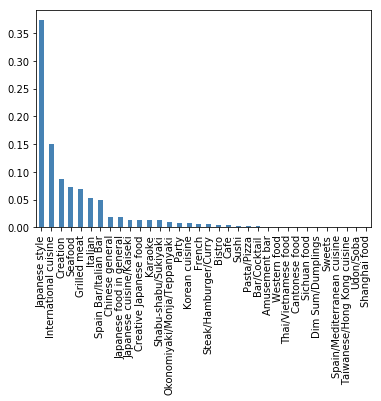

In [83]:
# 比率をプロット
(hpg_genre_name_dist/len(raw_hpg_store_info)).plot.bar(color='steelblue')

In [88]:
# 地名の数を確認
raw_hpg_store_info['hpg_area_name'].unique().size

119

In [89]:
hpg_area_name_dist = raw_hpg_store_info['hpg_area_name'].value_counts()

In [90]:
# 出現回数を表示
print('head_5')
print(hpg_area_name_dist.head())
print()
print('tail_5')
print(hpg_area_name_dist.tail())

head_5
Tōkyō-to Shinjuku-ku None              257
Tōkyō-to Chūō-ku Ginza                 198
Hyōgo-ken Kōbe-shi None                163
Ōsaka-fu Ōsaka-shi Shinsaibashisuji    150
Osaka Prefecture Osaka None            145
Name: hpg_area_name, dtype: int64

tail_5
Shizuoka-ken Fujinomiya-shi Wakanomiyachō    2
Niigata-ken Nagaoka-shi Rokusho              1
Hokkaidō Ashibetsu-shi None                  1
Tōkyō-to Shinagawa-ku Koyama                 1
Ōsaka-fu Minoo-shi Hanjo                     1
Name: hpg_area_name, dtype: int64


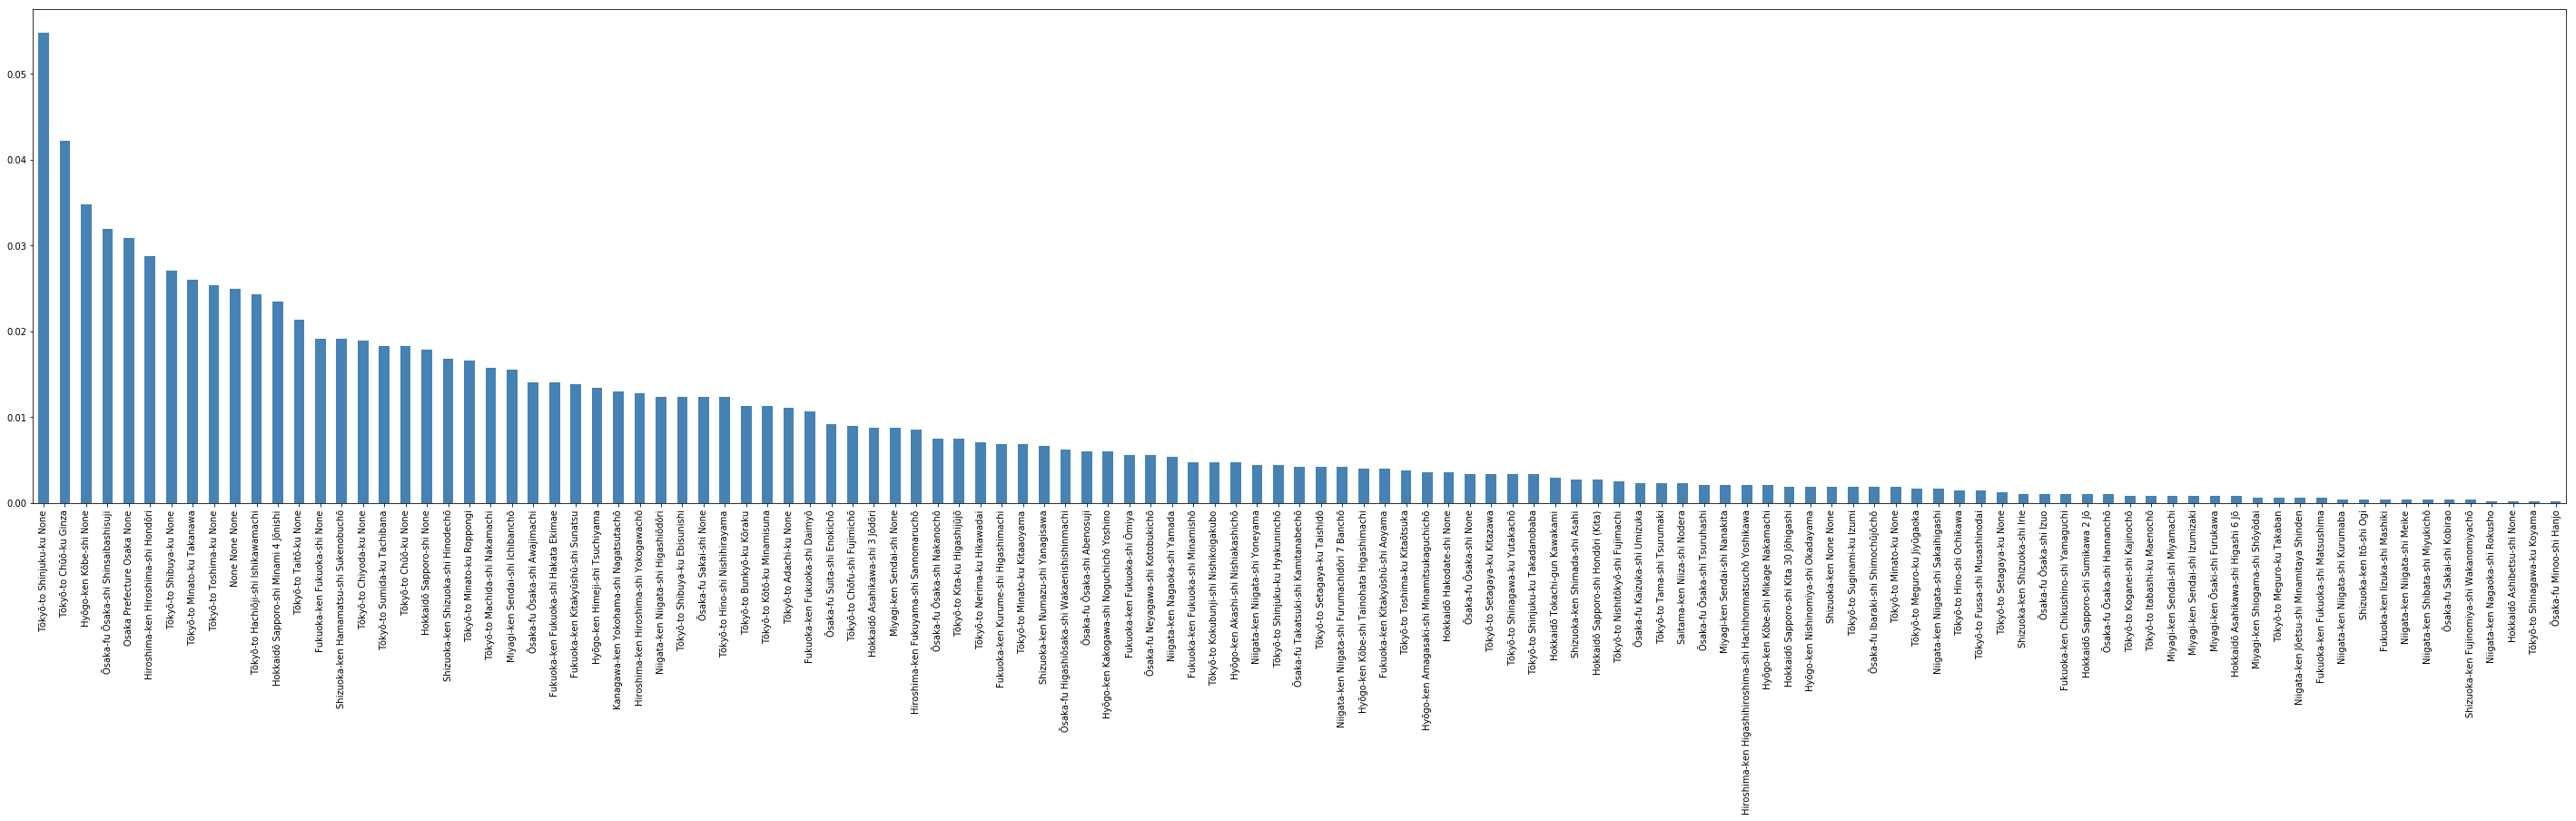

In [95]:
# 比率をプロット
(hpg_area_name_dist/len(raw_hpg_store_info)).plot.bar(color='steelblue',figsize=(50,10))


### 欠損を表す地名がある(117件)

In [147]:
raw_hpg_store_info.query('hpg_area_name == "None None None"').head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
651,hpg_5fea90674a2185a0,Japanese style,None None None,35.703381,139.660343
652,hpg_03d5b644f759a72a,Japanese style,None None None,35.703381,139.660343
653,hpg_0bf592f4c532d843,Japanese style,None None None,35.703381,139.660343
654,hpg_a11c66d3ce9a8c13,Japanese style,None None None,35.703381,139.660343
655,hpg_5cb7bac2842ca8f5,Japanese style,None None None,35.703381,139.660343


### 県名レベルでの集計

In [141]:
hpg_pref_name = raw_hpg_store_info['hpg_area_name'].apply(lambda x:x.split(' ')[0])

In [142]:
# 県の数
hpg_pref_name.unique().size

13

In [143]:
hpg_pref_name_dist = hpg_pref_name.value_counts()

In [144]:
# 出現回数を表示
print('head_5')
print(hpg_pref_name_dist.head())
print()
print('tail_5')
print(hpg_pref_name_dist.tail())

head_5
Tōkyō-to       2076
Ōsaka-fu        514
Fukuoka-ken     380
Hyōgo-ken       331
Hokkaidō        298
Name: hpg_area_name, dtype: int64

tail_5
Niigata-ken     142
Miyagi-ken      139
None            117
Kanagawa-ken     61
Saitama-ken      11
Name: hpg_area_name, dtype: int64


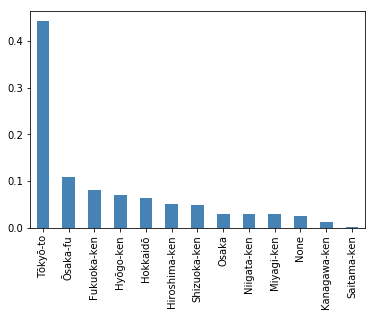

In [145]:
# 比率をプロット
(hpg_pref_name_dist/len(raw_hpg_store_info)).plot.bar(color='steelblue')
